### Author: MMADI KGOTSO
    
#### Name:  Conversion Optimization Assignment
    
#### Discription: This exercise is for knowledge test on how i approach a data driven problem
    
#### Date Completed: 2018/11/13

In [1]:
# we will first import pandas(python data analysis library) and numpy(number manipulation library)

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Read the data into the python environment (jupyter notebook)

data = pd.read_csv('C:/Users/pphahlamohlaka/Downloads/Pet_Heaven_2017.csv')

In [3]:
data.head()

,date,channelGrouping,sessions,transactions,transactionRevenue,itemQuantity
0,20170101,(Other),42,0,0.00,0
1,20170101,Direct,35,1,670.00,1
2,20170101,Display,10,1,44.99,4
3,20170101,Email,24,0,0.00,0
4,20170101,Organic Search,116,4,4122.21,17


In [4]:
#convert the date column to string

import numpy as np
data['date'] = np.array(data.date, str)

In [5]:
# split the date into year, month and day

data['year'] = [d[0:4] for d in data.date.values]
data['month'] = [d[4:6] for d in data.date.values]
data['day'] = [d[6:8] for d in data.date.values]

In [6]:
data.tail()

,date,channelGrouping,sessions,transactions,transactionRevenue,itemQuantity,year,month,day
2906,20171231,Email,25,0,0.00,0,2017,12,31
2907,20171231,Organic Search,177,3,2734.79,12,2017,12,31
2908,20171231,Paid Search,174,1,477.20,4,2017,12,31
2909,20171231,Referral,5,0,0.00,0,2017,12,31
2910,20171231,Social,15,0,0.00,0,2017,12,31


In [7]:
# rename the month column from numbers to actual names

data['month'] = data['month'].replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [8]:
data.head()

,date,channelGrouping,sessions,transactions,transactionRevenue,itemQuantity,year,month,day
0,20170101,(Other),42,0,0.00,0,2017,Jan,01
1,20170101,Direct,35,1,670.00,1,2017,Jan,01
2,20170101,Display,10,1,44.99,4,2017,Jan,01
3,20170101,Email,24,0,0.00,0,2017,Jan,01
4,20170101,Organic Search,116,4,4122.21,17,2017,Jan,01


In [9]:
#data2 = data.copy()

In [10]:
#calculate conversion rate and add the column to the dataframe

data['conversionRate'] = data['transactions'] / data['sessions']

In [11]:
data.tail(5)

,date,channelGrouping,sessions,transactions,transactionRevenue,itemQuantity,year,month,day,conversionRate
2906,20171231,Email,25,0,0.00,0,2017,Dec,31,0.000000
2907,20171231,Organic Search,177,3,2734.79,12,2017,Dec,31,0.016949
2908,20171231,Paid Search,174,1,477.20,4,2017,Dec,31,0.005747
2909,20171231,Referral,5,0,0.00,0,2017,Dec,31,0.000000
2910,20171231,Social,15,0,0.00,0,2017,Dec,31,0.000000


In [12]:
# calculate the AOV and add the column to the dataframe

data['AOV'] = data['transactionRevenue'] / data['transactions']

In [13]:
data.head()

,date,channelGrouping,sessions,transactions,transactionRevenue,itemQuantity,year,month,day,conversionRate,AOV
0,20170101,(Other),42,0,0.00,0,2017,Jan,01,0.000000,NaN
1,20170101,Direct,35,1,670.00,1,2017,Jan,01,0.028571,670.0000
2,20170101,Display,10,1,44.99,4,2017,Jan,01,0.100000,44.9900
3,20170101,Email,24,0,0.00,0,2017,Jan,01,0.000000,NaN
4,20170101,Organic Search,116,4,4122.21,17,2017,Jan,01,0.034483,1030.5525


In [14]:
# get the highest AOV by month

tot = data.groupby('month').AOV.sum()

In [15]:
# sort values from high to low (descending)

tot.sort_values(ascending=False)

month
Nov    130641.832675
Jun    128962.329958
Oct    126578.839967
Mar    121505.093194
May    117942.342462
Jul    117452.896396
Jan    117143.669981
Aug    116873.409192
Dec    115821.334325
Feb    113057.175898
Sep    112338.452254
Apr     97730.573958
Name: AOV, dtype: float64

In [16]:
# get the highest conversion rate by month 

tot1 = data.groupby('month').conversionRate.sum()

In [17]:
tot1.sort_values(ascending=False)

month
Feb    10.715824
Jan     7.492165
Nov     6.581425
Apr     6.076831
Mar     5.642424
Dec     5.632164
Jul     5.434254
Aug     5.230353
Oct     5.151513
Sep     5.104119
Jun     4.768195
May     4.038648
Name: conversionRate, dtype: float64

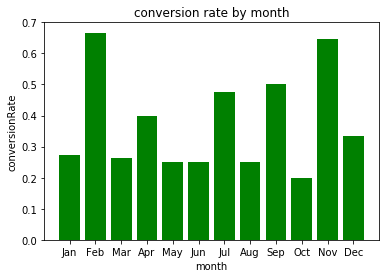

In [19]:
# plot conversion rate by month

figsize=(15,15)
ax = plt.axes()
xline_channel = data['month']
yline_items = data['conversionRate']
ax.bar(xline_channel,yline_items, color='g')
ax.set_title('conversion rate by month')
plt.xlabel('month')
plt.ylabel('conversionRate')
plt.show()

#### from here we are calculating the estimated revenue if conversion rate increased with 0.55%

In [20]:
total_rev = data['conversionRate'] * 0.0055

In [21]:
revenue = total_rev.sum()

In [22]:
revenue

0.3952735318506689

In [23]:
revenue_sum = data['transactionRevenue'].sum()

In [24]:
# this here is the revenue for year 2017 without increase
revenue_sum

7140188.67

In [25]:
Final_Rev = revenue_sum * revenue

In [26]:
Final_Rev

2822327.59367103

In [27]:
Total_Revenue = Final_Rev + revenue_sum

In [28]:
# This is the revenue after 0.55% conversion increase

Total_Revenue

9962516.26367103